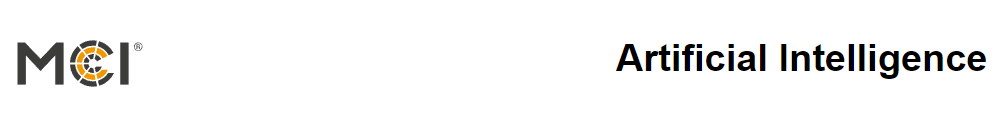

---

# 01 c Multilinear Regression - Normal Equation

-----
## 1. Data Science, AI und ML

Data Science is a wide field in computer science. Parts of it is strongly connected to artificial intelligence (AI). As most of AI research is in weak AI, which is also strongly linked to machine learning, this notebook trys to link the three somehow.

In a typical process in Data Science we has the following steps:
 - Get & describe problem
 - Aquire data
 - Process data
 - Analyze data
 - Develop models
 - Visualize results
 - Deploy in product

Within this process AI is often linked to every step except the first and last one. In many cases the methods that are used within the AI steps are ML based. This notebook tries to explain the process along a given example.

### 1.1. The Problem & Data Aquisition

In medicine and sports the correct alignment of an axis is cruicial for further analysis (Problem: How can we align an axis in a good way? | Get & describe problem). For ACL (anterior cruciate ligament) injuries so called risk factors are highly relevant for a good decision making during a ACL reconstruction. One of the risk factors is the so called tibia slope. For an automized measurement of the tibia slope it is highly relevant to align the tibia axis correctly. As patients vary in their tibias orientation during a CT (computer tomography) scan the tibia axis has to be defined trough intelligent processing of the transversal tibia scans. Let's assume we have multiple transversal CT scans of a tibia bone. To make things as easy as possible, have a look at the given image:

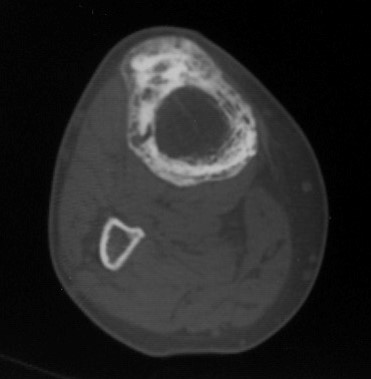

This is a transversal scan of a tibia. Assuming we have several of these layers we can also assume, that each of these layers can be segmented for the areas of the tibia bone. Each of the segmented areas has an average coordinate, leading to a series of coordinates, which are build in a way that they have a x-component, a y-component, and a z-component (that is equal to the layer number). At MCI, we have access to tibia scans.

To load such data, we have to import several libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 120 # we do this to get bigger plots

In the image below, the yellow area is the segmented area and red is average coordinate of the segmeted area. Imagine that each layer of the CT scan has this red dot.


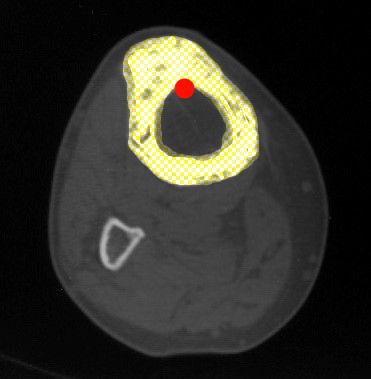

Given that each layer has an average segmented coordinate, we can think of them like the most likely point that is on the tibia axis. Therefore, creating a line that is as close as possible to these average segemnted coordinates could be a very good tibia axis.

See the image below to understand how the axis alignment could look like:

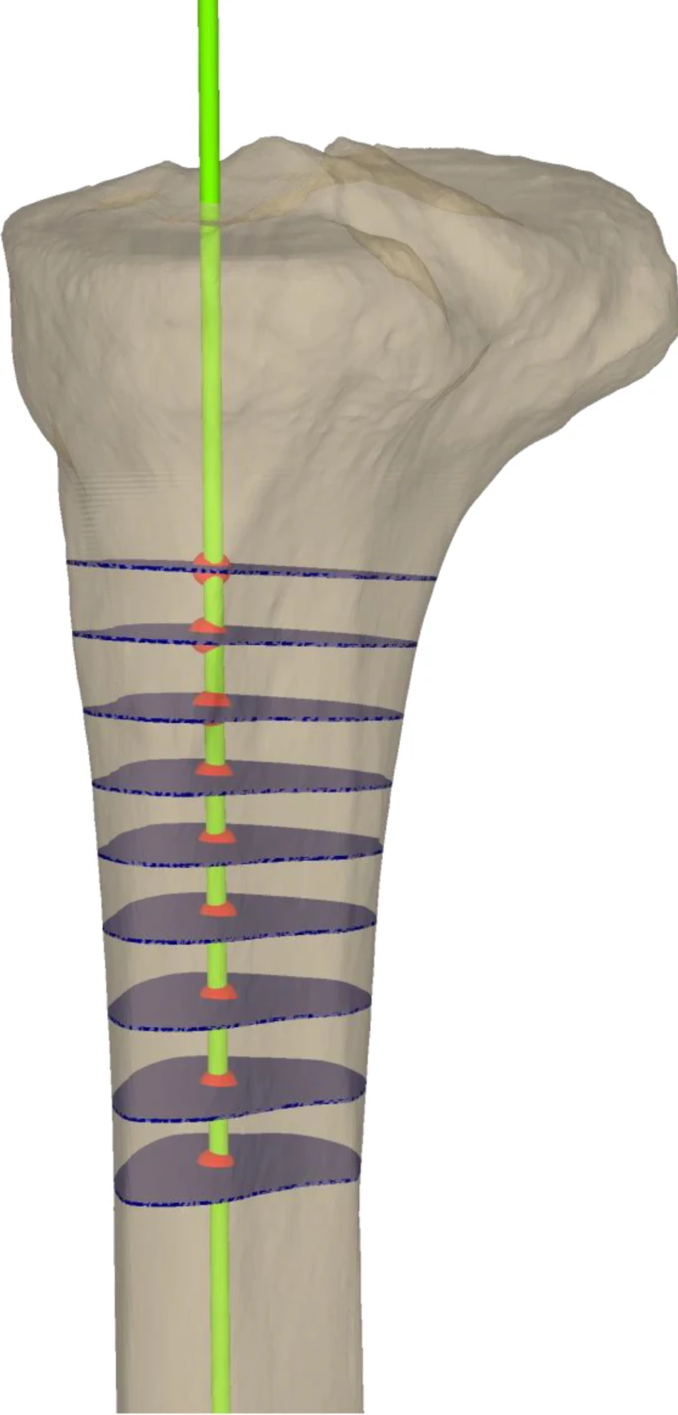


Now that we have understood the principle idea how we want to create the tibia axis from the CT scans, we can take further steps, starting with loading the data.

In a first step we get access to the data by stating the path to it.

In [2]:
path_to_file="../Data/Tibia_Axis_Determination/tibia_alignment.csv"

Then we read the csv file that contains the average segmented coordinates

In [3]:
df=pd.read_csv(path_to_file)
df.describe()

,x,y,z
count,38.000000,38.000000,38.000000
mean,115.526316,258.526316,18.500000
std,5.539718,5.926290,11.113055
min,105.000000,249.000000,0.000000
25%,111.250000,254.000000,9.250000
50%,115.000000,258.000000,18.500000
75%,119.750000,262.750000,27.750000
max,127.000000,273.000000,37.000000


Most of the people like to have visual information about the given data. Seeing the data as a table or a definition (as given above) is usually less intuitive to understand. Therefore, we use a 3D scatter plot to visualize the given data.

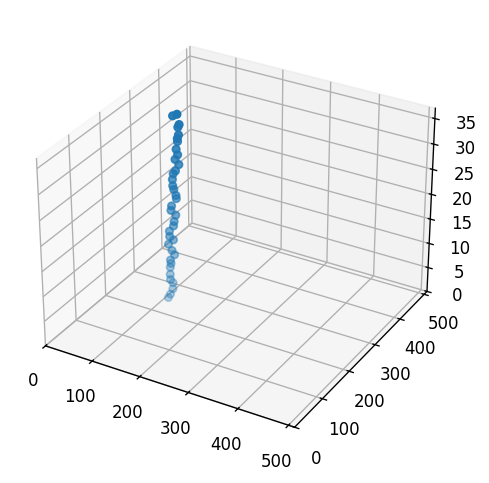

In [4]:
ax = plt.figure().add_subplot(projection='3d')
ax.axis([0, 512, 0, 512,0,max(df.z)])
ax.scatter(df.x,df.y,df.z)

### 1.2. Process and Analyze Data

The data was aquired, or in this case loaded. Most likely a linear regression for a two dimensional problem was already solved in previous lectures. Now it is a 3D problem. What could be the next steps?

Well, up till now linear regression worked with the typical optimization approach, meaning that we start with an initial guess calculating the error, deriving the error function, changing the parameter and repeat this till we have reached a minimal error.

In contrast to this approach there is a dircet method to find the optimal linear regression. The mathamatics behind it is the following:


$\theta = (M_d^TM_d)^{-1}M_d^To$

where $\theta$ is the resulting vector containing all the coefficients for the linear approximation for an n-dimensional function (multilinear approximation). $M_d$ is the so called design matrix, that contains all the input data. $o$ is our output data. As this is usually quite difficult to understand at first we go trough it in this example.

In our given data we have two input dimensions. The x-component and the y-component of each CT scan layer. Based on these input dimensions we can calculate the output, which would be the z-component. From a funcional perspective we can write this as:

$z(x,y)= d + k_1 \cdot x + k_2 \cdot y$

Obviosly, we have a twodimensional function $z$, which is dependant to $x$ and $y$. Now we need to connect the function $z(x,y)$ to $\theta$.

#### Step 1: Create $M_d$

$M_d$ is a matrix that contains all the input data points but has an additional first column with all ones in it. From a dimension perspective this means the following:
We have two dimensions as input for our function $z(x,y)$. Therefore $M_d$ has 2 plus 1 columns. As we have 38 CT layers $M_d$ will have 38 rows. This is how the code looks like:

In [5]:
Md=df[['x','y']].to_numpy()
# add a column at the left with all ones in it to the array
Md = np.c_[np.ones(Md.shape[0]), Md]

print(Md)

[[  1. 105. 252.]
 [  1. 111. 250.]
 [  1. 114. 254.]
 [  1. 112. 258.]
 [  1. 111. 251.]
 [  1. 110. 252.]
 [  1. 106. 259.]
 [  1. 109. 257.]
 [  1. 111. 252.]
 [  1. 117. 257.]
 [  1. 114. 253.]
 [  1. 106. 254.]
 [  1. 115. 257.]
 [  1. 112. 249.]
 [  1. 111. 250.]
 [  1. 117. 255.]
 [  1. 119. 254.]
 [  1. 119. 260.]
 [  1. 112. 255.]
 [  1. 114. 254.]
 [  1. 117. 266.]
 [  1. 120. 260.]
 [  1. 115. 261.]
 [  1. 116. 256.]
 [  1. 113. 260.]
 [  1. 113. 263.]
 [  1. 121. 258.]
 [  1. 124. 265.]
 [  1. 118. 262.]
 [  1. 123. 263.]
 [  1. 120. 263.]
 [  1. 117. 273.]
 [  1. 121. 266.]
 [  1. 126. 262.]
 [  1. 120. 270.]
 [  1. 127. 263.]
 [  1. 110. 269.]
 [  1. 124. 261.]]


#### Step 2: Create $o$

$o$ is a vector that contains all the output data points. From a dimension perspective this means the following:
We have one dimension as output for our function $z(x,y)$. Therefore $o$ has 1 column. As we have 38 CT layers $o$ will have 38 rows. This is how the code looks like:

In [6]:
o=df['z'].to_numpy()

print(o)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37.]


#### Step 3: Get the coefficients

Calculate $\theta$ according to:

$\theta = (M_d^TM_d)^{-1}M_d^To$

What should we expect from $theta$ from a dimensional perspective? Well, according to $z(x,y)$ we can expect it to have three coefficients in them ($k_1$, $k_2$ and $d$), so we expect a vector with the shape of (1,3)

In [7]:
theta=np.linalg.inv(Md.T@Md)@Md.T@o
print(theta)

[-350.07726492    0.87885067    1.03295823]


Now that we know the coefficients we can tray to plot the approximation function based.

In [8]:
z_approx=theta[0]+theta[1]*Md[:,1]+theta[2]*Md[:,2]

The approximation $z_{approx}$ should now be plotted along the data to see how well the axis aligns with the data

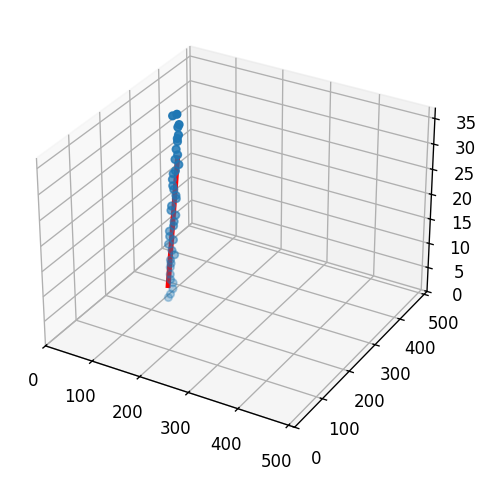

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.axis([0, 512, 0, 512,0,max(df.z)])
ax.scatter(df.x,df.y,df.z)
ax.plot([df.x.iloc[0],df.x.iloc[-1]],[df.y.iloc[0],df.y.iloc[-1]],[z_approx[0],z_approx[-1]], color='red', linewidth=3)